## INTRODUCTION : 

This notebook describes the apical gradients 

In [1]:
#import packages : 

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
import pandas as pd
import numpy as np
import os
import sys 
import random
from scipy.optimize import minimize

##import experimental data  for the lateral gradients : 

dir='./Experimental_Data'

#import data from high affinity nanobody (VHH)  experiment
vhh=pd.read_csv(dir+'/hh-VHH-CD8.csv')
col = vhh.loc[: , "1":"11"]
vhh['signal_mean'] = col.mean(axis=1)
vhh['signal_std'] = col.std(axis=1)

#import data from high affinity nanobody + fat body trap experiment

fat_body=pd.read_csv(dir+'/20190712 ptc-sGFP hh-VHH-CD8, lpp>VHH-CD8.csv')
col = fat_body.loc[: , "1":"7"]
fat_body['signal_mean'] = col.mean(axis=1)
fat_body['signal_std'] = col.std(axis=1)


#import data from high affinity nanobody overexpression  experiment

vhh_gal4=pd.read_csv(dir+'/20190709 ptc-sG hhG4 UAS-VHH-CD8_copy_pandas.csv')
col = vhh_gal4.loc[: , "sample1":"sample8"]
vhh_gal4['signal_mean'] = col.mean(axis=1)
vhh_gal4['signal_std'] = col.std(axis=1)

#import data from low affinity nanobody experiment
lag3=pd.read_csv(dir+'/20190307 ptc-sG hh-LaG3-CD8.csv')
col = lag3.loc[: , "1":"10"]
lag3['signal_mean'] = col.mean(axis=1)
lag3['signal_std'] = col.std(axis=1)


##import the data for apical gradients:

lag3_apical=pd.read_csv(dir+'/lag3_apical_normalized.csv',sep=',')
vhh_apical=pd.read_csv(dir+'/vhh_apical_normalized.csv',sep=',')
fat_body_apical=pd.read_csv(dir+'/fat_body_apical_normalized.csv',sep=',')

## Fig S3 C Plot the apical profile for the Nb high and Nb high+fat body experiments

The offset by 15 data points for apical profiles and 7 data points for lateral profiles are chosen to start the profile at the maximum,

assuming that the rising values before are due to experimental imprecision on the location of the boundary.

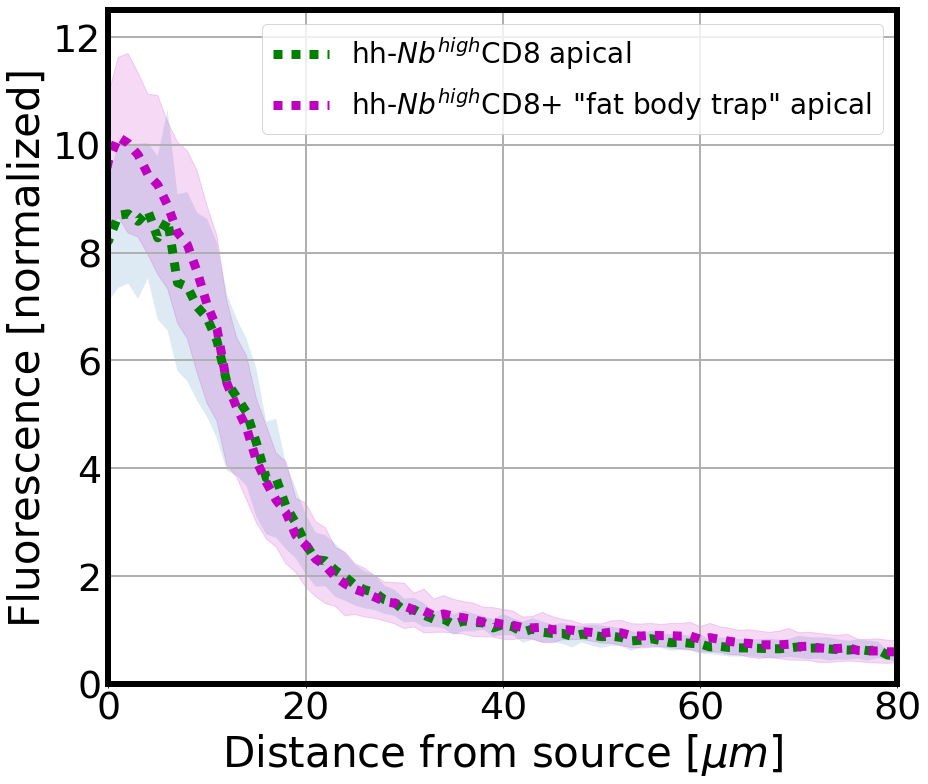

In [2]:
Lstyle='dashed'
Lstyle=(0,(1,1))
Lstyle2=Lstyle
f1, ax1 = plt.subplots(1, 1,figsize = (13,11))

ax1.plot(vhh_apical['X']-vhh_apical['X'][15],
         vhh_apical['mean'],
         lw=9,
         color='g',
         linestyle=Lstyle)
yerr=vhh_apical['std']
ax1.fill_between(vhh_apical['X']-vhh_apical['X'][15],
                 vhh_apical['mean']-yerr,
                 vhh_apical['mean']+yerr,
                 lw=9,
                 alpha=0.15)
ax1.plot(fat_body_apical['X']-fat_body_apical['X'][15],
         fat_body_apical['mean'],
         lw=9,
         color='m',
         linestyle=Lstyle)
yerr=fat_body_apical['std']
ax1.fill_between(fat_body_apical['X']-fat_body_apical['X'][15],
                 fat_body_apical['mean']-yerr,
                 fat_body_apical['mean']+yerr,
                 alpha=0.15,
                 color='m')
ax1.set_xlim([0,80])
ax1.set_ylim([0,12.5])
ax1.set_ylabel(r"Fluorescence [normalized]",fontsize =42)
ax1.set_xlabel(r"Distance from source $[\mu m] $",fontsize =42)
plt.xticks([0, 20, 40, 60,  80])
plt.yticks([0, 2, 4, 6, 8, 10, 12])
ax1.tick_params(labelsize=38)
ax1.legend([r'hh-$Nb^{high}$CD8 apical',
            r'hh-$Nb^{high}$CD8+ "fat body trap" apical'],
           fontsize=28)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(6)
ax1.grid(True,lw=2)
plt.tight_layout() 
plt.savefig('./Figures/Fig_S3-C.pdf',format='pdf',dpi=600)
plt.show()

## Fig S3 D Plot the lateral and apical profiles for Nb high and Nb low 

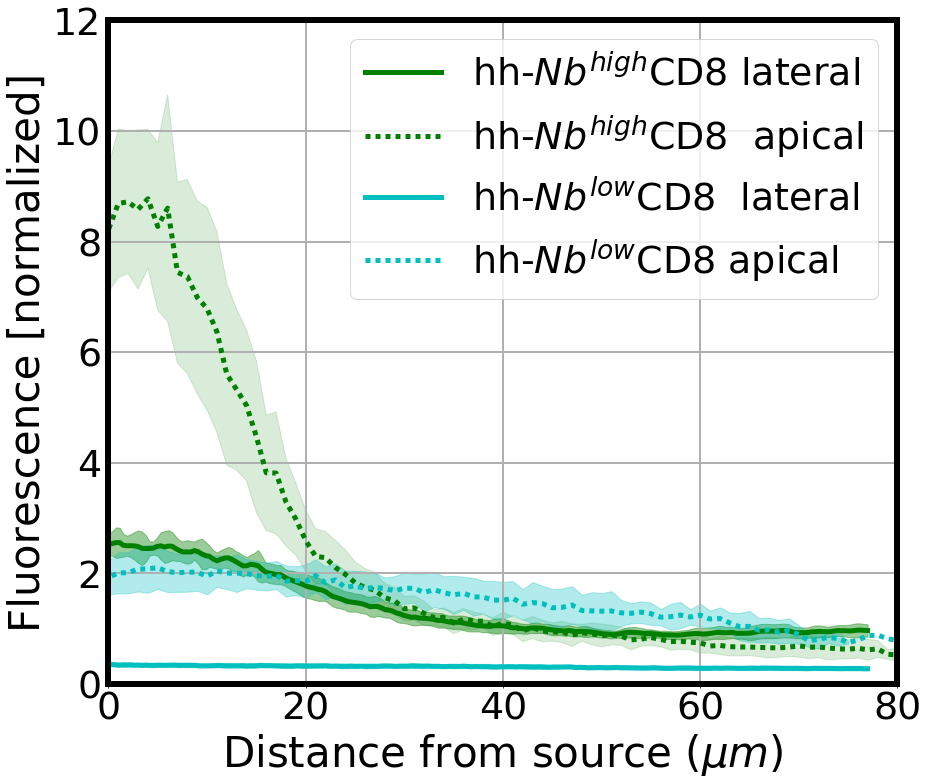

In [3]:
f1, ax1 = plt.subplots(1, 1,figsize = (13,11))
ax1.plot(vhh['distance'][7:211]-vhh['distance'][7],
         vhh['signal_mean'][7:211],
         lw=5,
         color='g')
ax1.fill_between(vhh['distance'][7:211]-vhh['distance'][7],
                 vhh['signal_mean'][7:211]-vhh['signal_std'][7:211],
                 vhh['signal_mean'][7:211]+vhh['signal_std'][7:211],
                 color='g',
                 alpha=0.4)
ax1.plot(vhh_apical['X']-vhh_apical['X'][15],
         vhh_apical['mean'],
         lw=5,color='g',
         linestyle=Lstyle)
yerr=vhh_apical['std']
ax1.fill_between(vhh_apical['X']-vhh_apical['X'][15],
                 vhh_apical['mean']-yerr,
                 vhh_apical['mean']+yerr,
                 color='g',
                 alpha=0.15)
ax1.plot(lag3['distance'][7:211]-lag3['distance'][7],
         lag3['signal_mean'][7:211],
         lw=5,
         color='c')
ax1.fill_between(lag3['distance'][7:211]-lag3['distance'][7],
                 lag3['signal_mean'][7:211]-lag3['signal_std'][7:211],
                 lag3['signal_mean'][7:211]+lag3['signal_std'][7:211],
                 color='c',
                 linestyle=Lstyle,
                 alpha=0.4)
ax1.plot(lag3_apical['X']-lag3_apical['X'][15],
         lag3_apical['mean'],
         lw=5,
         color='c',
         linestyle=Lstyle)
yerr=lag3_apical['std']
ax1.fill_between(lag3_apical['X']-lag3_apical['X'][15],
                 lag3_apical['mean']-yerr,
                 lag3_apical['mean']+yerr,
                 color='c',
                 alpha=0.3)
ax1.set_xlim([0,80])
ax1.set_ylim([0,10.5])
plt.xticks([0, 20, 40, 60,  80])
plt.yticks([0, 2, 4, 6, 8, 10, 12])
ax1.set_ylabel(r"Fluorescence [normalized]",fontsize =42)
ax1.set_xlabel(r"Distance from source $(\mu m) $",fontsize =42)
ax1.tick_params(labelsize=38)
ax1.legend([r'hh-$Nb^{high}$CD8 lateral',
            r'hh-$Nb^{high}$CD8  apical',
            r'hh-$Nb^{low}$CD8  lateral',
            r'hh-$Nb^{low}$CD8 apical'],fontsize=38)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(6)
ax1.grid(True,lw=2)
plt.tight_layout() 
plt.savefig('./Figures/Fig_S3-D.pdf',format='pdf',dpi=600)
plt.show()


## Simulating gradient formation laterally and apically 

In [6]:
## Code for gradients formation in the lateral space  : 
#domain size (in um)
L = 116
#size of the source
source_size_value = 26
#number of points within the domain
nb_x_points = 400
#array of values of x positions
#one takes nb_x_points+1, assuming that nb_x_points is even, to make sure
#that the point 0 is included in the array.
#also round up by 12 decimals to make sure that 0 is at 0.
x_array = np.around(np.linspace(-(1.0 - 1.0 / 2.0/ float(nb_x_points)) * L,
                      (1.0 - 1.0 / 2.0/ float(nb_x_points)) * L,
                      nb_x_points+1)
                    ,
                    12)
#define a set of masks which are useful to solve the equations.
mask_tissue_posterior = x_array >= 0
mask_tissue_anterior = x_array < - source_size_value
mask_source = (x_array >=-source_size_value) &(x_array <0)
#spatial resolution
delta_x = x_array[1]-x_array[0]

#define a function that will return the time evolution of the concentration profile

def dcdt_function(c_array,
                  t,
                  J,
                  D,
                  h,
                  k_on,
                  k_off,
                  jr,
                  kappa_H,
                  source_size,
                  k_H):
    """Differential equations for the concentration equation, discretized in x,
    and for the evolution of the source concentration.
    c_array is the current concentration profile,
    t is the time point
    J is the influx from the source
    D is the diffusion constant
    h is the size of the intercellular space
    k_on is the on rate to receptors
    k_off is the off rate from receptors
    jr is the product of k, the effective degradation rate,
    and nT, the total density of receptors
    kappa_H is the exchange rate between tissue and hemolymph
    source_size is the length of the source
    k_H is the degradation rate in the hemolymph
    """
    #cH is the concentration in the hemolymph
    #here always assumed to be at equilibrium
    cH = kappa_H * np.mean(c_array)/(kappa_H + k_H)
    #calculate second derivative, imposing boundary conditions on the first derivative
    #on the left the derivative is imposed to vanish
    #on the right the derivative is imposed to vanish
    cxx=np.zeros(len(c_array))
    cxx[1:-1] = (c_array[2:]+c_array[0:-2] - 2.0 * c_array[1:-1]) / (delta_x**2)
    cxx[0] = (c_array[1]-c_array[0])/(delta_x**2)
    cxx[-1] = (c_array[-2]-c_array[-1])/(delta_x**2)
    # Compute dc/dt, the change of concentration
    dcdt_vector = np.zeros(len(x_array))
    dcdt_vector[mask_source] = (D * cxx[mask_source]
                                + J
                                - kappa_H * (c_array[mask_source] - cH))
    dcdt_vector[mask_tissue_posterior] =  (D * cxx[mask_tissue_posterior]
                                          - 1.0 / h 
                                           * k_on 
                                           * jr
                                           *c_array[mask_tissue_posterior] 
                                          /(k_off
                                            + k_on
                                            * c_array[mask_tissue_posterior])
                                          - kappa_H
                                           * (c_array[mask_tissue_posterior] - cH))
    dcdt_vector[mask_tissue_anterior] =  (D * cxx[mask_tissue_anterior]
                                          - kappa_H 
                                          * (c_array[mask_tissue_anterior] - cH))
    #return the vector dc/dt 
    return dcdt_vector
def predicted_bound_GFP_function(x_data,
                                 J,
                                 D,
                                 h,
                                 k_on,
                                 k_off,
                                 jr,
                                 kappa_H,
                                 source_size,
                                 k_H,
                                 precision):
    #"precision" stops the simulation if a steady state has been reached
    time_0 = 500
    nb_time_points = 20
    pseudo_time_array = np.linspace(0, time_0, nb_time_points)
    initial_condition = np.zeros(len(x_array))
    # calculate the profile of free GFP
    sol = odeint(dcdt_function,
                 initial_condition,
                 pseudo_time_array,
                 args=(J, D, h, k_on, k_off, jr, kappa_H, source_size, k_H)
                 )
    sol1=sol[-1, :]
    sol2=sol[-2, :]
    j=0
    while np.mean(np.square(sol1/sol2-1))>precision : 
        j+=1
        pseudo_time_array = np.linspace((j-1)*time_0,
                                        j*time_0,
                                        nb_time_points)
        sol = odeint(dcdt_function,
                 sol1,
                 pseudo_time_array,
                 args=(J, D, h, k_on, k_off, jr, kappa_H, source_size, k_H)
                 )
        sol1=sol[-1, :]
        sol2=sol[-2, :]
        if j>10 : 
            print("no steady state")
            sol1=sol2
    final_sol_free_GFP = sol[-1, :]
    final_sol_bound_GFP=np.zeros_like(final_sol_free_GFP)
    # from the profile of free GFP, calculate the profile of bound GFP
    final_sol_bound_GFP[mask_tissue_posterior] =\
    (k_on * nT_value * final_sol_free_GFP[mask_tissue_posterior]
     /(k_off + k_on * final_sol_free_GFP[mask_tissue_posterior]))
    
    #The global variable nT is just a scaling factor. By setting it to 1, this function returns the normalized 
    #profile of bound receptors nb/nT. For special cases where the total number of receptors varies we change nT.
    predicted_bound_GFP = np.interp(x_data, x_array, final_sol_bound_GFP)
    return predicted_bound_GFP

In [7]:
## Code for the apical gradient formation  : 
##This code is smilar but doesn't have the description of the hemolymph anymore.
def dcdt_function_apical(c_array,
                         t,
                         J,
                         D,
                         h,
                         k_on,
                         k_off,
                         jr,
                         source_size):
    """Differential equations for the concentration equation, discretized in x,
    and for the evolution of the source concentration.
    c_array is the current concentration profile,
    t is the time point
    J is the influx from the source
    D is the diffusion constant
    h is the size of the intercellular space
    k_on is the on rate to receptors
    k_off is the off rate from receptors
    jr is the product of k, the effective degradation rate,
    and nT, the total density of receptors
    kappa_H is the exchange rate between tissue and hemolymph
    source_size is the length of the source
    k_H is the degradation rate in the hemolymph
    """
    #calculate second derivative, imposing boundary conditions on the first derivative
    #on the left the derivative is imposed to vanish
    #on the right the derivative is imposed to vanish
    cxx=np.zeros(len(c_array))
    cxx[1:-1] = (c_array[2:]+c_array[0:-2] - 2.0 * c_array[1:-1]) / (delta_x**2)
    cxx[0] = (c_array[1]-c_array[0])/(delta_x**2)
    cxx[-1] = (c_array[-2]-c_array[-1])/(delta_x**2)
    # Compute dc/dt, the change of concentration
    dcdt_vector = np.zeros(len(x_array))
    dcdt_vector[mask_source] = D * cxx[mask_source] + J 
    dcdt_vector[mask_tissue_posterior] =  (D * cxx[mask_tissue_posterior]
                                          - 1.0 / h
                                           * k_on * jr
                                           *c_array[mask_tissue_posterior] 
                                          /(k_off + k_on * c_array[mask_tissue_posterior]))
    dcdt_vector[mask_tissue_anterior] =  (D * cxx[mask_tissue_anterior])
    #return the vector dc/dt 
    return dcdt_vector


def predicted_bound_GFP_function_apical(x_data,
                                 J,
                                 D,
                                 h,
                                 k_on,
                                 k_off,
                                 jr,
                                 source_size,
                                 precision):
    #"precision" stops the simulation if a steady state has been reached
    time_0 = 500
    nb_time_points = 20
    pseudo_time_array = np.linspace(0, time_0, nb_time_points)
    initial_condition = np.zeros(len(x_array))
    # calculate the profile of free GFP
    sol = odeint(dcdt_function_apical,
                 initial_condition,
                 pseudo_time_array,
                 args=(J, D, h, k_on, k_off, jr, source_size)
                 )
    sol1=sol[-1, :]
    sol2=sol[-2, :]
    j=0
    while np.mean(np.square(sol1/sol2-1))>precision : 
        j+=1
        pseudo_time_array = np.linspace((j-1)*time_0, j*time_0, nb_time_points)
        sol = odeint(dcdt_function_apical,
                 sol1,
                 pseudo_time_array,
                 args=(J, D, h, k_on, k_off, jr,source_size)
                 )
        sol1=sol[-1, :]
        sol2=sol[-2, :]
        if j>100 : 
            print("no steady state")
            sol1=sol2
    final_sol_free_GFP = sol[-1, :]
    final_sol_bound_GFP=np.zeros_like(final_sol_free_GFP)
    # from the profile of free GFP, calculate the profile of bound GFP
    final_sol_bound_GFP[mask_tissue_posterior] = (k_on * nT_value * final_sol_free_GFP[mask_tissue_posterior]
                            /(k_off + k_on * final_sol_free_GFP[mask_tissue_posterior]))
    
    #The global variable nT is just a scaling factor. By setting it to 1, this function returns the normalized 
    #profile of bound receptors nb/nT. For special cases where the total number of receptors varies we change nT.
    predicted_bound_GFP = np.interp(x_data, x_array, final_sol_bound_GFP)
    return predicted_bound_GFP

## Fig S3E Plotting lateral and apical  gradients : 


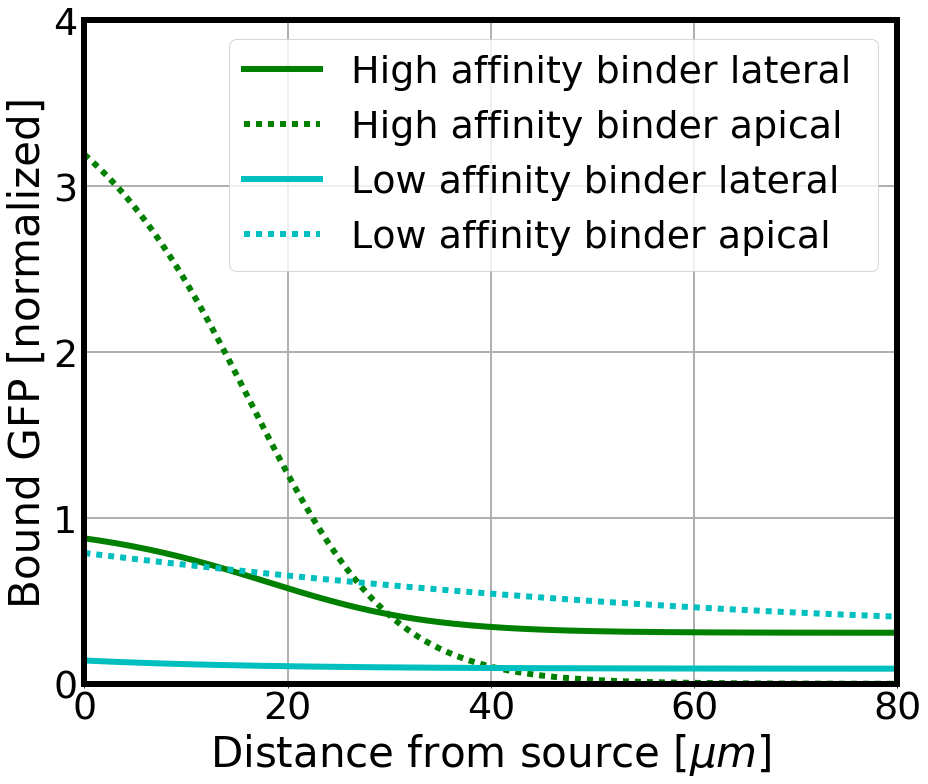

In [8]:
#diffusion constant in um/s^2
D_value = 21. 
# on rate for the high affinity nanobody, in /nM/s
k_on_value = 7.7 * 10 **(-4) 
# off rate for the high affinity nanobody, in /s
k_off_value = 1.7 * 10 ** (-4) 
# on rate for the low affinity nanobody,in /nM/s
k_on_value_LAG3 = 2 * 10 ** (-3) 
# off rate for the low affinity nanobody, in /s
k_off_value_LAG3 = 5 * 10 ** (-2) 
# size of the source in microns
source_size_value = 26. 
# intercellular space in um
h_lat = 0.02 
# size of peripodial space in um (estimate)
h_ap = 0.05 
#influx from the source in nM/s
J_value = 0.3 
# the factor h_lat/h_ap ensures that the production of ligand per unit surface is the same apically and laterally
J_value_ap = J_value * h_lat / h_ap 
#exchange rate between tissue and hemolymph, in /s
kappa_H_value = 0.075 
#degradation rate in hemolymph
k_H_value = 0.01 
#product of degradation rate and receptor density in nM.um/s
jr_value_lat = 2.6e-3 
# There are 4 times more receptors apically than laterally
jr_value_ap = 4 * jr_value_lat 
# number of receptors : =1 as normalized to lateral density of receptors 
nT_value0 = 1
nT_value = nT_value0 
precision=1e-11 # precision in the ODE integration
result_vhh_lateral =\
predicted_bound_GFP_function(vhh['distance'][7:]-vhh['distance'][7],
                             J_value,
                             D_value,
                             h_lat,
                             k_on_value,
                             k_off_value,
                             jr_value_lat,
                             kappa_H_value,
                             source_size_value,
                             k_H_value,
                             precision)

result_lag3_lateral =\
predicted_bound_GFP_function(vhh['distance'][7:]-vhh['distance'][7],
                             J_value,
                             D_value,
                             h_lat,
                             k_on_value_LAG3,
                             k_off_value_LAG3,
                             jr_value_lat,
                             kappa_H_value,
                             source_size_value,
                             k_H_value,
                             precision)

nT_value = nT_value0 * 4 # density of receptors apically: 4 times higherthan lateral density of receptors,  
result_vhh_apical =\
predicted_bound_GFP_function_apical(vhh['distance'][7:]-vhh['distance'][7],
                                    J_value_ap,
                                    2*D_value,#no tortuosity apically so diffusion is two times larger
                                    h_ap,
                                    k_on_value,
                                    k_off_value,
                                    jr_value_ap,
                                    source_size_value,
                                    precision)

result_lag3_apical =\
predicted_bound_GFP_function_apical(vhh['distance'][7:]-vhh['distance'][7],
                                    J_value_ap,
                                    2*D_value,#no tortuosity apically so diffusion is two times larger
                                    h_ap,
                                    k_on_value_LAG3,
                                    k_off_value_LAG3,
                                    jr_value_ap,
                                    source_size_value,
                                    precision)

f2, ax2 = plt.subplots(1, 1,figsize = (13,11))
lw1=6
ax2.plot(vhh['distance'][7:]-vhh['distance'][7],
         result_vhh_lateral,
         lw=lw1,
         color='g')
ax2.plot(vhh['distance'][7:]-vhh['distance'][7],
         result_vhh_apical,
         lw=lw1,
         color='g',
         linestyle=Lstyle2)
ax2.plot(vhh['distance'][7:]-vhh['distance'][7],
         result_lag3_lateral,
         lw=lw1,
         color='c')
ax2.plot(vhh['distance'][7:]-vhh['distance'][7],
         result_lag3_apical,
         lw=lw1,
         color='c',
         linestyle=Lstyle2)
ax2.set_xlim([0,80])
ax2.set_ylim([0,4])
plt.xticks([0, 20, 40, 60,  80])
plt.yticks([0, 1, 2, 3, 4])
ax2.set_ylabel(r"Bound GFP [normalized]",fontsize =42)
ax2.set_xlabel(r"Distance from source $[\mu m] $",fontsize =42)
ax2.tick_params(labelsize=38)
ax2.legend([r'High affinity binder lateral ',
            r'High affinity binder apical',
            r'Low affinity binder lateral',
            r'Low affinity binder apical' ],
           fontsize=38)
for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(6)
ax2.grid(True,lw=2)
plt.tight_layout()
f2.savefig('./Figures/Fig_S3-E.eps',format='eps',dpi=600)
plt.show()